In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()

In [2]:
y = np.random.randint(2, size=1000)
x = np.zeros((1000, 2))

for i in range(1000):
    mean = [y[i], y[i]]
    cov = [[0.1, 0], [0, 0.1]]
    x[i, :] = np.random.multivariate_normal(mean, cov)


In [3]:
model = LogisticRegression()
model.fit(x, y)
predicts = model.predict(x)
accuracy = model.score(x, y)
print('The accuracy of the model: '+ str(accuracy))
print('The weights and the corresponded terms of the model: ', end='')
print("yi = L(", model.intercept_[0], str(model.coef_[0][0]) if model.coef_[0][0] < 0 else ' + ' + str(model.coef_[0][0]), ' × ', 'Xi0', str(model.coef_[0][1]) if model.coef_[0][1] < 0 else ' + ' + str(model.coef_[0][1]),' × ', 'Xi1', ')')
# print(model.coef_)
# print(model.intercept_)

The accuracy of the model: 0.992
The weights and the corresponded terms of the model: yi = L( -5.228952186282611  + 5.689948505561741  ×  Xi0  + 4.682243903583087  ×  Xi1 )


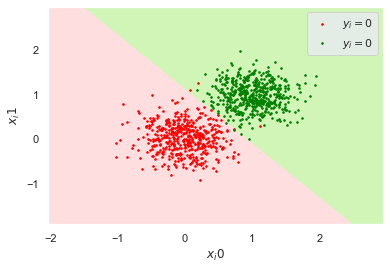

In [4]:
# Create color maps -> boundary color
cmap_light = ListedColormap(['#ffdee0', '#d1f4b7'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x0_min = x[:, 0].min() - 1
x0_max = x[:, 0].max() + 1
x1_min = x[:, 1].min() - 1
x1_max = x[:, 1].max() + 1

# step size in the mesh
delta = .005
xx, yy = np.meshgrid(np.arange(x0_min, x0_max, delta), np.arange(x1_min, x1_max, delta))
# np.ravel() flatten the matrix 
# np.c[m1, m2] zips corresponding element of the two row matrix m1, m2
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the datas points
st0 = plt.scatter(x[y == 0, 0], x[y == 0, 1], s=2.5, color='red', label=f"$y_i=0$")
st1 = plt.scatter(x[y == 1, 0], x[y == 1, 1], s=2.5, color='green', label=f"$y_i=0$")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.xlabel(f"$x_i0$")
plt.ylabel(f"$x_i1$")
plt.show()